In [0]:
#Import neccesary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

**We need to import numpy and pandas library for our predictive modelling. Next, we will import our training file into Jupiter notebook.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_all.csv to cleaned_all.csv


In [3]:
df = pd.read_csv('cleaned_all.csv')
#Explore the variables
print(df.dtypes)

Unnamed: 0                                int64
Unnamed: 0.1                              int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


**We visualised the types of all variables & converted the dependen variable to categorical type**

In [0]:
df.SeriousDlqin2yrs = (df.SeriousDlqin2yrs).astype('category')

**Next we visualised whether first 2,3 principal components of the data explains a lot of variance in data. This is not the case as top 6 PC's explains only ~82% of variance**

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'],axis=1)), columns = df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'],axis=1).columns)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_std)
print(pca.explained_variance_ratio_.cumsum())

[0.24612617 0.41598383 0.55069126 0.65415629 0.74505298 0.81772095
 0.87925848 0.93071701 0.96391217 0.98814172 1.        ]


**Importing all require packages**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix # for evaluation
import itertools

style.use('ggplot')
np.random.seed(42)

**We just vizualized the distribution of each and every variable once before building models. We used the Python's seaborn library for this purpose. Now we import the different libraries which we will be using for our modelling purpose**

<Figure size 648x576 with 0 Axes>

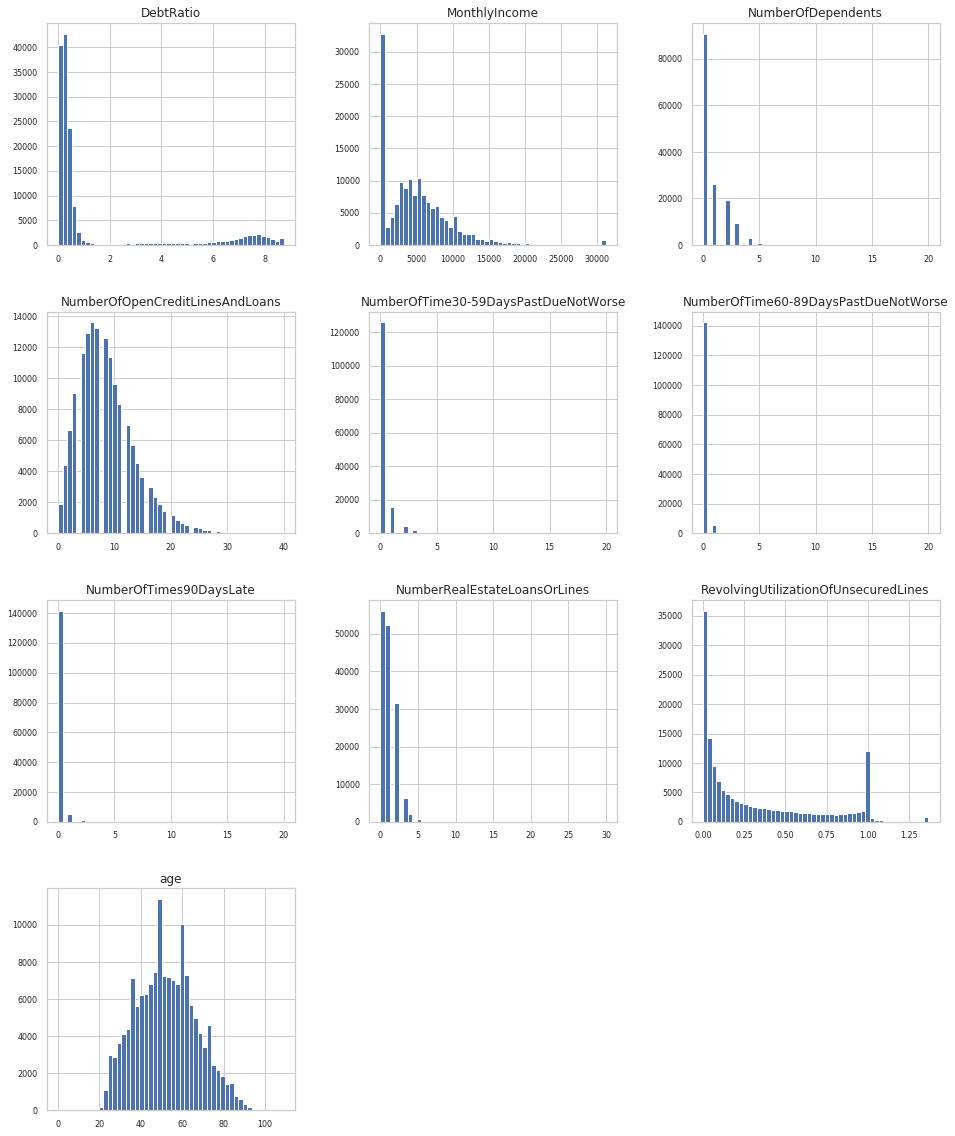

In [44]:
plt.figure(figsize=(9, 8))
df[['RevolvingUtilizationOfUnsecuredLines',	'age',	'NumberOfTime30-59DaysPastDueNotWorse',	'DebtRatio',	'MonthlyIncome',	'NumberOfOpenCreditLinesAndLoans',	'NumberOfTimes90DaysLate',	'NumberRealEstateLoansOrLines',	'NumberOfTime60-89DaysPastDueNotWorse',	'NumberOfDependents']].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

**Based on the above visualization, we have decided to do log transformation of some highly skewed variables, so that our data meets the assumptions of all the models we are planning to try**

In [7]:
dataset = df[['RevolvingUtilizationOfUnsecuredLines',	'age',	'NumberOfTime30-59DaysPastDueNotWorse',	'DebtRatio',	'MonthlyIncome',	'NumberOfOpenCreditLinesAndLoans',	'NumberOfTimes90DaysLate',	'NumberRealEstateLoansOrLines',	'NumberOfTime60-89DaysPastDueNotWorse',	'NumberOfDependents']]
print(dataset.shape)
dataset['TimRevolvingUtilizationOfUnsecuredLinese'] = np.log(dataset['RevolvingUtilizationOfUnsecuredLines'] + 1)
dataset['NumberOfTimes90DaysLate'] = np.log(dataset['NumberOfTimes90DaysLate'] + 1)
dataset['NumberOfTime60-89DaysPastDueNotWorse'] = np.log(dataset['NumberOfTime60-89DaysPastDueNotWorse'] + 1)
dataset['NumberOfTime30-59DaysPastDueNotWorse'] = np.log(dataset['NumberOfTime30-59DaysPastDueNotWorse'] + 1)
dataset['NumberRealEstateLoansOrLines'] = np.log(dataset['NumberRealEstateLoansOrLines'] + 1)
dataset['MonthlyIncome'] = np.log(dataset['MonthlyIncome'] + 1)

(150000, 10)


**Let's now visualize the transformed data**

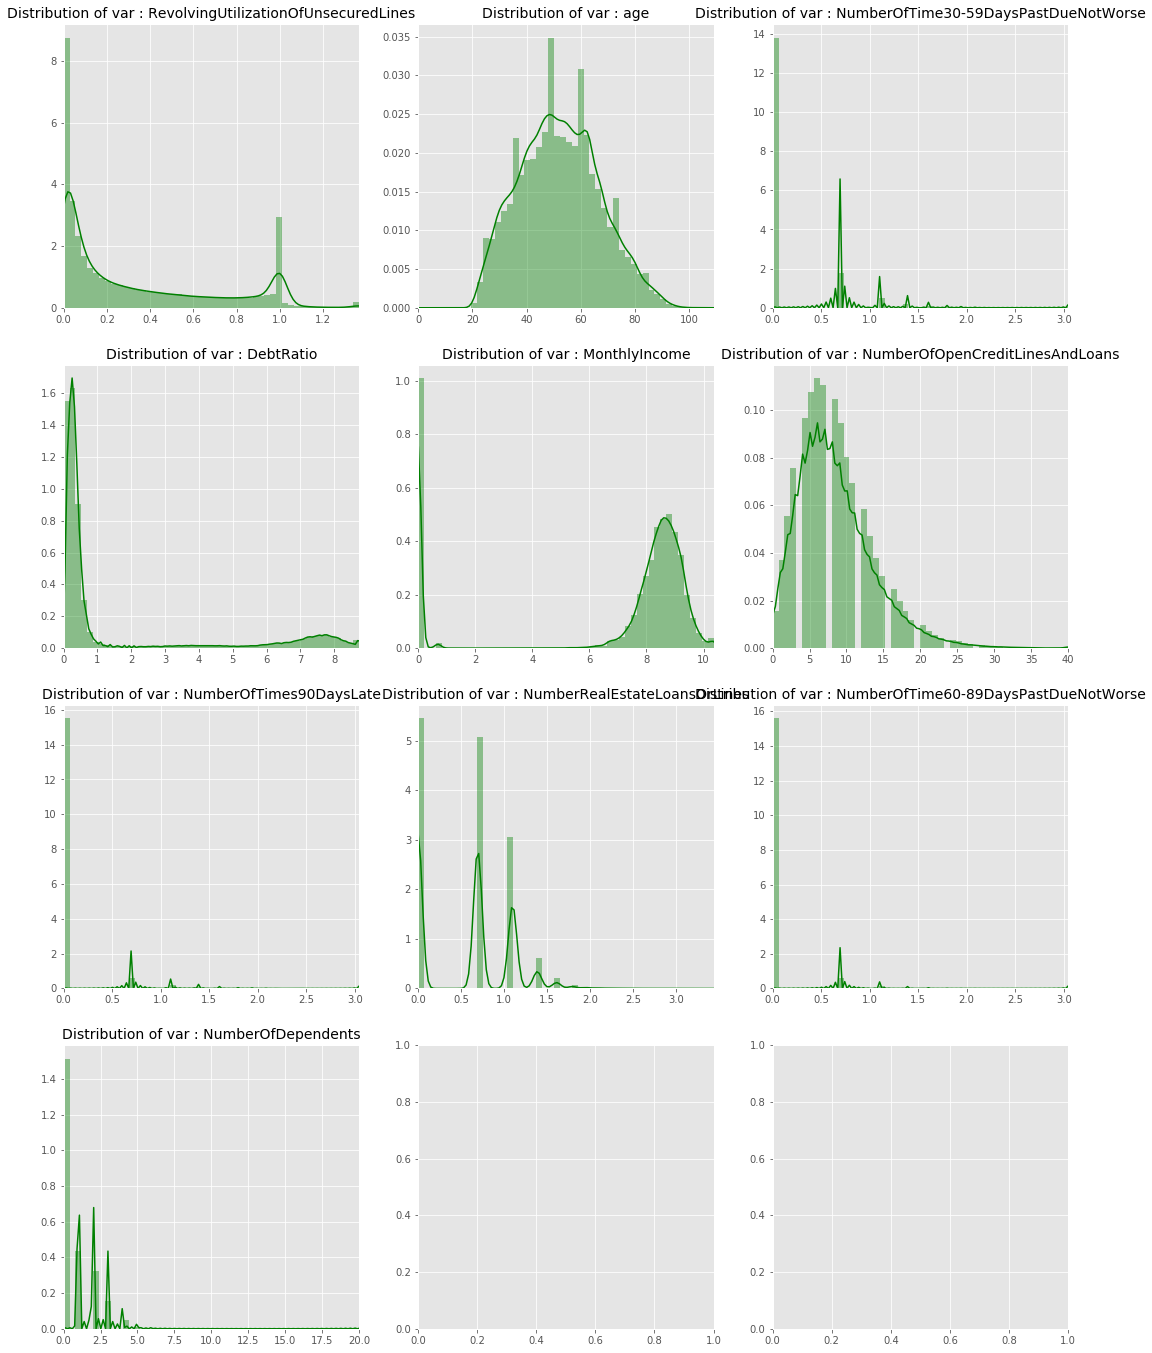

In [8]:
fig, ax = plt.subplots(((dataset.shape[1]-1) // 3 + 1), 3, figsize=(18,24))

j=0
for i in range(dataset.shape[1]-1):
    var_val = dataset.iloc[:,i].values
    var_name = dataset.columns[i]
        
    sns.distplot(var_val, ax=ax[i//3,j], color='g')
    ax[i//3,j].set_title('Distribution of var : ' + var_name, fontsize=14)
    ax[i//3,j].set_xlim([min(var_val), max(var_val)])

    j+=1
    if j == 3:
        j=0

**We will now split our credit_data dataframe into 2 different dataframes : train and test. All training will be done on train data, along with 5 fold cross-validation. Test data will be kept untouched and only the finalised model(s) will be tested on the test data**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(dataset,df['SeriousDlqin2yrs'],test_size = 0.3,random_state=100,shuffle = True)

print(y_train.value_counts()[1]/X_train.shape[0])
print(y_test.value_counts()[1]/X_test.shape[0])

0.06688571428571428
0.06673333333333334


**Scaling the data, which is important before training several models like knn classifier**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


**We will now try some of the classification techniques (keeping the default parameters) and check their cross-validation results in terms of AUC**

In [12]:


classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="sigmoid", C=0.025, probability=True)
    ]

# Logging for Visual Comparison
log_cols=["Classifier", "cross_val_score"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    auc_scores = cross_val_score(clf,X_train,y_train,cv=5,scoring=make_scorer(roc_auc_score))
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    print("Accuracy: {:.2%}".format(auc_scores.mean()))
    
    log_entry = pd.DataFrame([[name, auc_scores.mean()]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 57.51%
KNeighborsClassifier
****Results****
Accuracy: 60.30%
DecisionTreeClassifier
****Results****
Accuracy: 61.31%
LinearDiscriminantAnalysis
****Results****
Accuracy: 64.51%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 72.70%
SVC
****Results****
Accuracy: 58.40%


**Visualising the cross-validation AUC of all models. Best performing model is QDA, with cross-validation AUC score of 0.72**

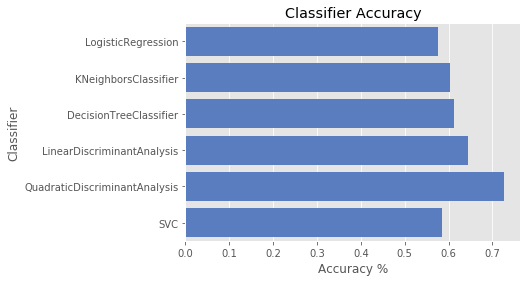

In [13]:
sns.set_color_codes("muted")
sns.barplot(x="cross_val_score", y="Classifier", data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


In [14]:
print(log)

                      Classifier  cross_val_score
0             LogisticRegression         0.575064
0           KNeighborsClassifier         0.602976
0         DecisionTreeClassifier         0.613142
0     LinearDiscriminantAnalysis         0.645131
0  QuadraticDiscriminantAnalysis         0.726991
0                            SVC         0.584017


**We will now try some of the ensable techniques. 2 very powerful ensamble techniques are random forest and gradiant boosting.**

**Let's start with random forest**

**We will be utilising RandomSearchCV to come up with ideal se of hyper parameters for getting best cross validation AUC**

In [15]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50,100,150], "max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              }

# run grid search
grid = RandomizedSearchCV(clf, param_grid, cv=5,scoring='roc_auc',n_iter = 10, iid=False)

grid.fit(X_train, y_train)
print("Grid-Search with roc_auc")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(grid.best_score_))
#print("Test set AUC: {:.3f}".format(
#roc_auc_score(y_test, grid.decision_function(X_test))))
#print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with roc_auc
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 1, 'max_depth': None}
Best cross-validation score (auc_roc)): 0.853



**Best cross-validation score (auc_roc)): 0.853**

**Now let's trtain the model using whole training data, using the best parameters and evaluate the prediction on the test data**

In [16]:
rfc = RandomForestClassifier(n_estimators= 150, min_samples_split= 2, max_features= 1, max_depth= 3)
rfc.fit(X_train, y_train)

y_pr=rfc.predict(X_test)
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])))

print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

Test set AUC: 0.854
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     41997
           1       0.00      0.00      0.00      3003

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000



array([[41997,     0],
       [ 3003,     0]])

**Test set AUC: 0.854**

**Let's plot the precision-recall-F-score curves to visualise that how well we can separate both classes at each threshold on the probabilities generated by the randomforests**

In [17]:
tresholds = np.linspace(0, 1, 100)
y_scores = rfc.predict_proba(X_test)[:, 1]
scores = []
for treshold in tresholds:
    y_hat = (y_scores > treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=y_test.values),
                 precision_score(y_pred=y_hat, y_true=y_test.values),
                 fbeta_score(y_pred=y_hat, y_true=y_test.values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5066178541255985 11


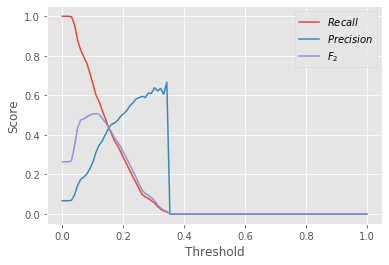

In [18]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


**Plotting the roc curve and marking the threshold which gives the best F1-score**

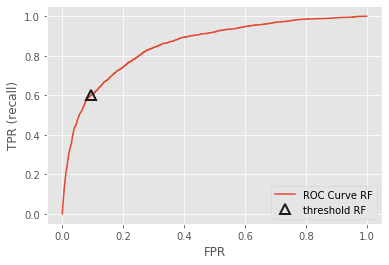

In [19]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


F_2 = list(scores[:, 2])
close_default_rf = tresholds[F_2.index(max(F_2))]
close_default_rf = np.argmin(np.abs(thresholds_rf - close_default_rf))



plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

**Repeating the same procedure for gradiant boosting**

**We will be utilising RandomSearchCV to come up with ideal se of hyper parameters for getting best cross validation AUC**

In [20]:
clf = GradientBoostingClassifier(random_state=0)
# use a full grid over all parameters
param_grid = {'n_estimators' : [20,30,40], "max_depth": [2,5,7,9],
              "max_features": [2,3,5] ,'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
              }
# run grid search
grid = RandomizedSearchCV(clf, param_grid, cv=5,scoring='roc_auc',n_iter = 10, iid=False)
grid.fit(X_train, y_train)
print("Grid-Search with roc_auc")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (auc_roc)): {:.3f}".format(grid.best_score_))
#print("Test set AUC: {:.3f}".format(
#roc_auc_score(y_test, grid.decision_function(X_test))))
#print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with roc_auc
Best parameters: {'n_estimators': 30, 'max_features': 3, 'max_depth': 7, 'learning_rate': 0.05}
Best cross-validation score (auc_roc)): 0.861


**Best cross-validation score (auc_roc)): 0.861**

**Now let's trtain the model using whole training data, using the best parameters and evaluate the prediction on the test data**

In [21]:
gbc = GradientBoostingClassifier(n_estimators= 40, max_features= 3, max_depth= 5, learning_rate= 0.25)
gbc.fit(X_train, y_train)

y_pr=gbc.predict(X_test)
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])))

print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

Test set AUC: 0.865
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41997
           1       0.56      0.20      0.30      3003

    accuracy                           0.94     45000
   macro avg       0.75      0.59      0.63     45000
weighted avg       0.92      0.94      0.92     45000



array([[41527,   470],
       [ 2399,   604]])

**Test set AUC: 0.865**

**Let's plot the precision-recall-F-score curves to visualise that how well we can separate both classes at each threshold on the probabilities generated by the randomforests**

In [22]:
tresholds = np.linspace(0, 1, 100)
y_scores = gbc.predict_proba(X_test)[:, 1]
scores = []
for treshold in tresholds:
    y_hat = (y_scores > treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=y_test.values),
                 precision_score(y_pred=y_hat, y_true=y_test.values),
                 fbeta_score(y_pred=y_hat, y_true=y_test.values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.5204043429427181 10


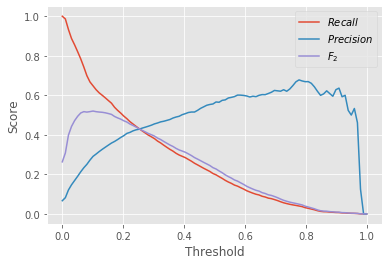

In [23]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()


**Plotting the roc curve and marking the threshold which gives the best F1-score**

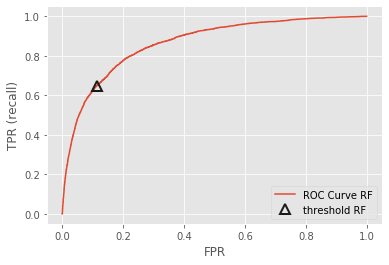

In [24]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")


F_2 = list(scores[:, 2])
close_default_rf = tresholds[F_2.index(max(F_2))]
close_default_rf = np.argmin(np.abs(thresholds_rf - close_default_rf))



plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

**Clearly none of the technique is able to separate the classes well and AUC by each model is not more than ~0.86**
**Let's visualize the distribution of data using T-SNE**

In [25]:
from sklearn.model_selection import train_test_split
X_TSNE, _, y_TSNE, _ = train_test_split(X_train,y_train,test_size = 0.9,random_state=100,shuffle = True)

print(y_TSNE.value_counts()[1]/X_TSNE.shape[0])
print(y_TSNE.value_counts())
print(X_TSNE.shape[0])

0.06571428571428571
0    9810
1     690
Name: SeriousDlqin2yrs, dtype: int64
10500


In [0]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)

tsne_features = model.fit_transform(X_TSNE)
#print(tsne_features.head())

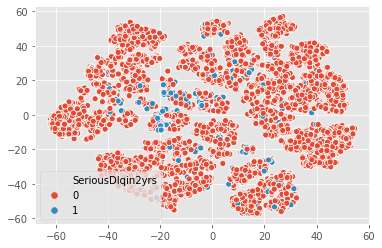

In [27]:
import seaborn as sns
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y_TSNE)
plt.show()

**Clearly both the classes are mixed with each other**

**Let's try some deep learning technique (Autoenncoders) to try to generate features from the data, using which we can separate out the classes**

In [28]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
1.15.0


In [29]:
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)


Using TensorFlow backend.


**Training the autoencoder, to create 50 features out of the data in the intermediate layer**

In [0]:
## input layer 
input_layer = Input(shape=(X_train.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X_train.shape[1], activation='relu')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

autoencoder.fit(X_train, X_train, 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

**Converting the train & test data into the 50 dimentional features using the first set of layers of the autoencoder**

In [0]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

hid_rep_X_train = hidden_representation.predict(X_train) 
hid_rep_X_test = hidden_representation.predict(X_test) 

In [32]:
print(hid_rep_X_train.shape)

(105000, 50)


**Taking the same sample (as we took before to generate the TSNE)**
**Generating the 50 features on this sample & visualising that if we are now able to separate out the two classes**

In [0]:
hid_rep_X_TSNE = hidden_representation.predict(X_TSNE) 


from sklearn.manifold import TSNE
model = TSNE(learning_rate=50,random_state=100)

tsne_features = model.fit_transform(hid_rep_X_TSNE)
#print(tsne_features.head())

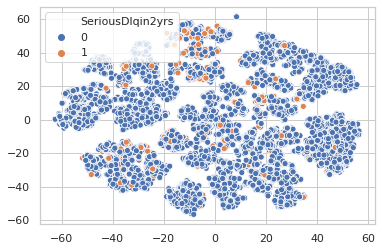

In [34]:
import seaborn as sns
sns.scatterplot(x = tsne_features[:,0], y = tsne_features[:,1], hue = y_TSNE)
plt.show()

**Clearly we are not yet able to separate the two classes**

**But we can still check out the performance after building any classification model (eg. logistic regression model), on this new 50 dimentionl features**

In [35]:

clf = LogisticRegression(solver="lbfgs").fit(hid_rep_X_train, y_train)
pred_y = clf.predict(hid_rep_X_test)

print ("")
print ("Classification Report: ")
print (classification_report(y_test, pred_y))




Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     41997
           1       0.59      0.18      0.27      3003

    accuracy                           0.94     45000
   macro avg       0.77      0.58      0.62     45000
weighted avg       0.92      0.94      0.92     45000


Accuracy Score:  0.9368666666666666


In [36]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,clf.predict_proba(hid_rep_X_test)[:,1]))


0.8574435184550192


**AUC on test data = 0.857**

**Let's try out some other techniques which fits a distribution on one class of the data and then we calculate the probabilities of any datapoint coming from that distribution**
**Thereafter, we classify the data points in two classes after applying a cut-off on the calculated probabilities**

**Let's try multivariate_normal distribution**

In [37]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


from scipy.stats import multivariate_normal

mu = X_train.mean(axis=0).values
sigma = X_train.cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)


print(np.median(model.logpdf(X_train[list(y_train == 0)].values))) 
print(np.median(model.logpdf(X_train[list(y_train == 1)].values))) 

-9.79652111444015
-15.083782872292446


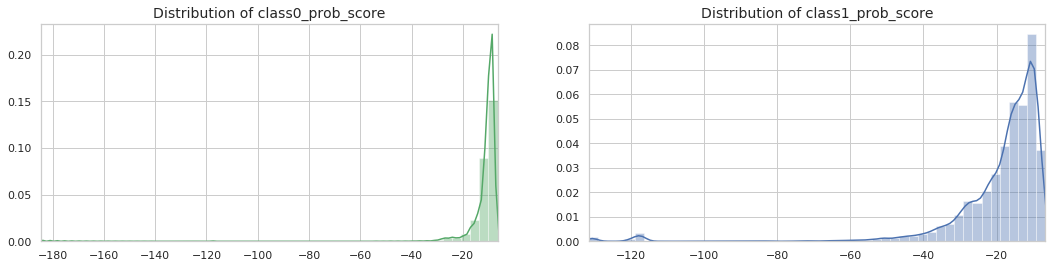

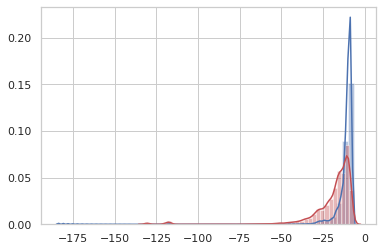

In [38]:



fig, ax = plt.subplots(1, 2, figsize=(18,4))

class0_prob_score = model.logpdf(X_train[list(y_train == 0)].values)
class1_prob_score = model.logpdf(X_train[list(y_train == 1)].values)

sns.distplot(class0_prob_score, ax=ax[0], color='g')
ax[0].set_title('Distribution of class0_prob_score', fontsize=14)
ax[0].set_xlim([min(class0_prob_score), max(class0_prob_score)])

sns.distplot(class1_prob_score, ax=ax[1], color='b')
ax[1].set_title('Distribution of class1_prob_score', fontsize=14)
ax[1].set_xlim([min(class1_prob_score), max(class1_prob_score)])

plt.show()



sns.distplot(class0_prob_score, color='b')
sns.distplot(class1_prob_score, color='r')
plt.show()

#Clear that not well separated



**Clearly, we are not able to separate our data using multivariate_normal distrtibution**

***Let's now try GaussianMixture distribution***

In [39]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=4, random_state=42)
gmm.fit(X_train.values)
print(gmm.score(X_train[y_train.values == 0].values))
print(gmm.score(X_train[y_train.values == 1].values))

7.587283170085445
-5.865955872417614


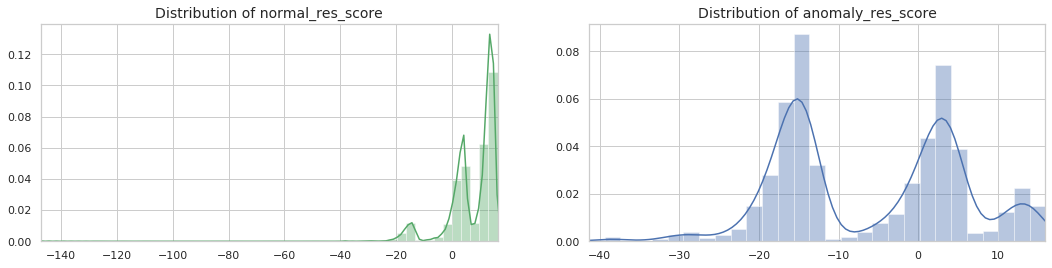

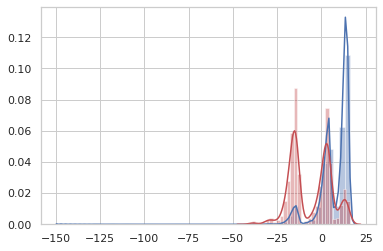

In [40]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))


normal_res_score = gmm.score_samples(X_train[y_train.values == 0].values)
anomaly_res_score = gmm.score_samples(X_train[y_train.values == 1].values)

sns.distplot(normal_res_score, ax=ax[0], color='g')
ax[0].set_title('Distribution of normal_res_score', fontsize=14)
ax[0].set_xlim([min(normal_res_score), max(normal_res_score)])

sns.distplot(anomaly_res_score, ax=ax[1], color='b')
ax[1].set_title('Distribution of anomaly_res_score', fontsize=14)
ax[1].set_xlim([min(anomaly_res_score), max(anomaly_res_score)])

plt.show()

sns.distplot(normal_res_score, color='b')
sns.distplot(anomaly_res_score, color='r')
plt.show()

#Clear that not well separated



**Clearly, we are not able to separate our data using GaussianMixture distrtibution**